Time Series

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

melakukan import library. import pandas untuk menganalisis data import numpy untuk pengolahan data operasi matematika import matplotlib untuk membuat grafik dan plot dari data yang di input import seaborn untuk membuat grafik dan statistik, dibuat berdasarkan library matplotlib yang terintegrasi dengan struktur data pada pandas import math untuk mengevaluasi operasi matematika yang kompleks import datetime untuk input datetime dari data %matplotlib inline untuk membuat grafik atau plot yang ditampilkan dalam bentuk notebook

# Import Dataset

Data Source : https://www.kaggle.com/datasets/akpmpr/google-stock-price-all-time

In [5]:
!gdown 1RNgJp3OC0_NB3NNsbm6LZXNR656qU7xZ

Downloading...
From: https://drive.google.com/uc?id=1RNgJp3OC0_NB3NNsbm6LZXNR656qU7xZ
To: /content/google.csv
100% 475k/475k [00:00<00:00, 20.3MB/s]


#Menampilkan file csv yang terdapat pada dataset

In [6]:
google_data = pd.read_csv('google.csv')
google_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


#Mengecek Missing Value pada data

In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4317 non-null   object 
 1   High       4317 non-null   float64
 2   Low        4317 non-null   float64
 3   Open       4317 non-null   float64
 4   Close      4317 non-null   float64
 5   Volume     4317 non-null   float64
 6   Adj Close  4317 non-null   float64
dtypes: float64(6), object(1)
memory usage: 236.2+ KB


#Mengecek Statistic Values untuk fitur

In [9]:
google_data.describe()


,High,Low,Open,Close,Volume,Adj Close
count,4317.000000,4317.000000,4317.000000,4317.000000,4.317000e+03,4317.000000
mean,639.682936,627.615621,633.603748,633.852357,6.523837e+06,633.852357
std,561.783142,552.069438,556.527532,557.255541,7.830526e+06,557.255541
min,50.680038,47.800831,49.409801,49.818268,7.922000e+03,49.818268
25%,247.507278,241.469910,244.832306,244.334183,1.593563e+06,244.334183
50%,401.988251,395.168823,399.004425,398.561096,3.851583e+06,398.561096
75%,933.440002,923.030029,929.059998,928.799988,8.268878e+06,928.799988
max,2936.409912,2912.290039,2918.989990,2916.840088,8.254163e+07,2916.840088


#Handle date/time data for time series

In [10]:
google_data['Date'] = pd.to_datetime(google_data['Date'])
google_data.set_index('Date', inplace=True)
google_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


#EXPLORATORY DATA ANALYSIS

Visualize the adjusted Close

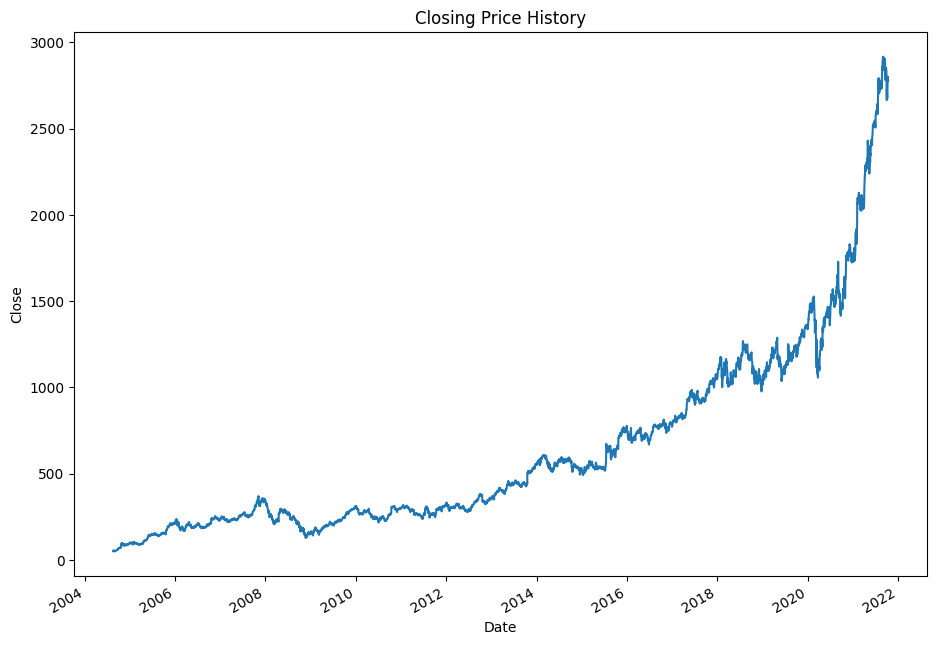

In [11]:
#Resize plot
plt.figure(figsize=(11, 8))
google_data['Close'].plot()
#adding a title for the figure
plt.title('Closing Price History')
# x label
plt.xlabel('Date')
# y label
plt.ylabel('Close')
plt.show()

Menunjukkan histori dari harga penutupan market

<Figure size 1600x800 with 0 Axes>

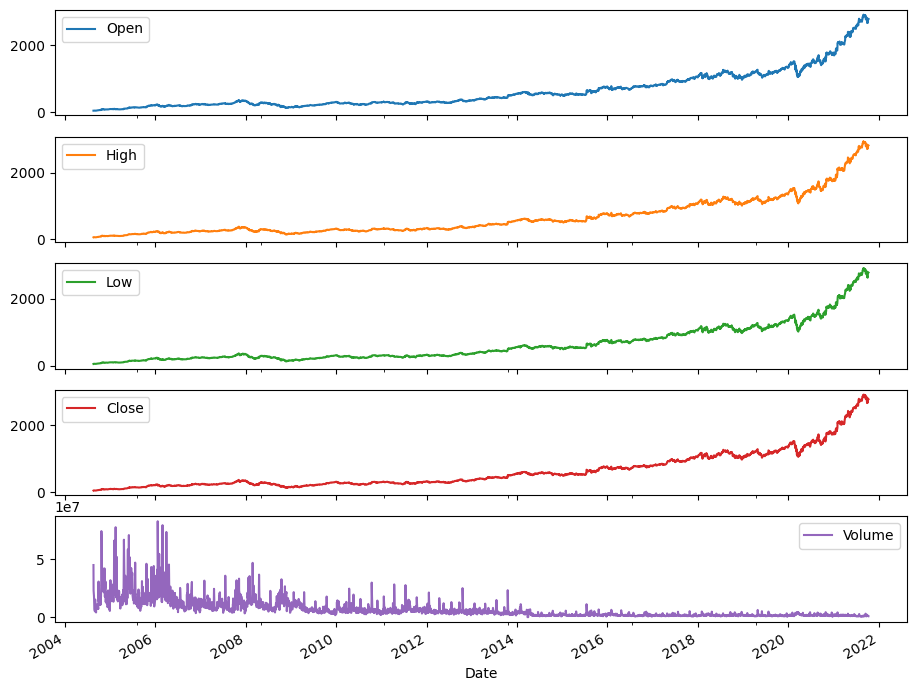

In [12]:
#resize the plot
plt.figure(figsize=(16, 8))
cols = ['Open', 'High', 'Low', 'Close', 'Volume']
axes =google_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Untuk data open, high, low, close itu mengalami kenaikan atau berjenis trend naik. Tetapi, untuk data vomue yang menunjukan jumlah pembeli saham itu mengalami naik turun atau stasioner.

In [13]:
google_data['HL_PCT'] = (google_data['High'] - google_data['Low']) / google_data['Low'] * 100.0
google_data['PCT_change'] = (google_data['Close'] - google_data['Open']) / google_data['Open'] * 100.0

In [14]:
df = google_data[['HL_PCT', 'PCT_change', 'Close','Volume']]

In [15]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Close'].shift(-forecast_out)

216


<ipython-input-15-e4fd59988e6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Close'].shift(-forecast_out)


#Membuat Fitur Baru untuk dataframe baru

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

#Melakukan Scalling

digunakan untuk normalisasi data

In [17]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-17-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [18]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

melakukan slicing. mengambil 'forecast_out' baris akhir dari 'x' dan hasilnya disimpan dengan nama variabel 'X_Predictions' yang berisi data yang akan diprediksi. selanjutnya mengambil semua baris dari 'x' kecuali 'forecast_out' baris terakhir untuk melatih model

In [19]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-19-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


menghapus baris-baris yang mengandung nilai yang hilang (NaN) dari dataset dengan parameter inplace = true. Selanjutnya membuat variabel y yang isinya kolom 'label'.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Melakukan splitting. dilakukan dengan 2 model (LinearRegression dan Random Forest Regressor)

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
lr_confidence

0.9165461688766906

#Random Forest

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)
rf_confidence

0.9617136647882719

In [25]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-25-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-25-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-25-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

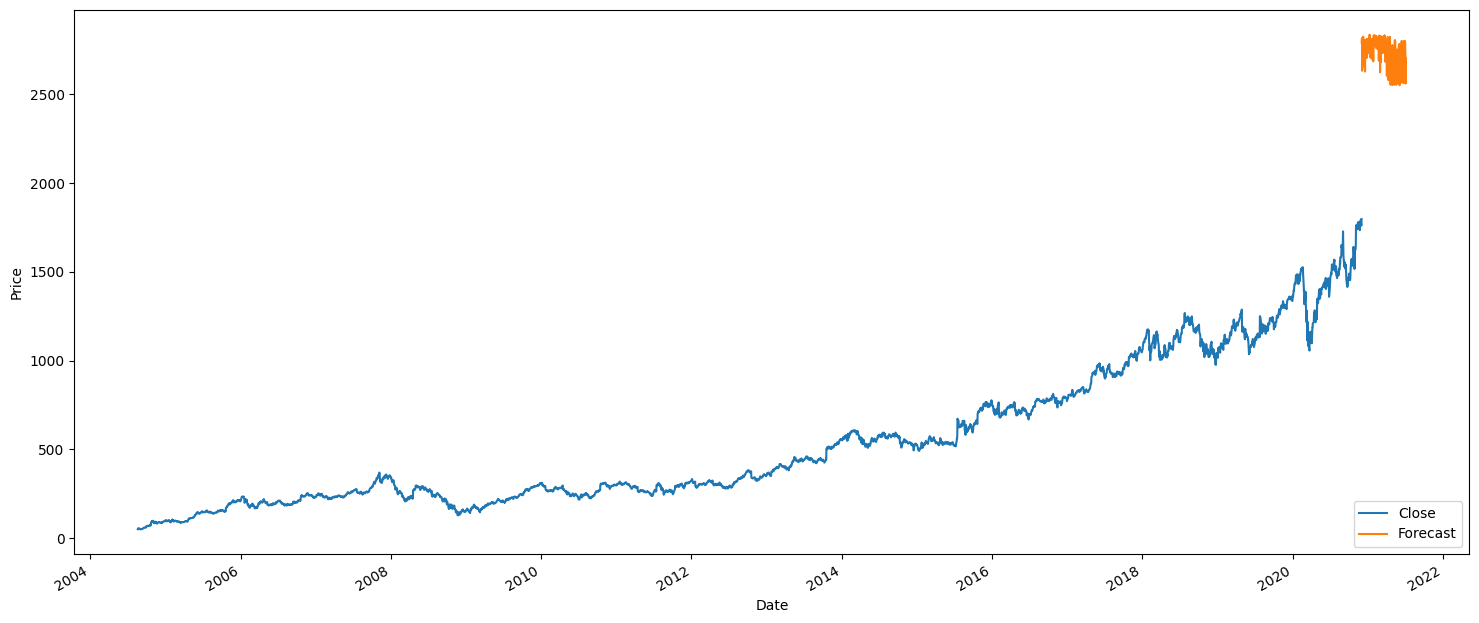

In [27]:
plt.figure(figsize=(18, 8))
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Diatas dapat diliah grafik forecast dari stoce price google yang akan datang